In [1]:
import psycopg2
import pandas as pd

# Establish a connection to the PostgreSQL database
conn = psycopg2.connect(
    dbname="real_estate_proj_3",
    user="postgres",        # <--------------- READ THIS
    password="postgres",    # <--------------- READ THIS
    host="localhost",
    port="5432"
)

In [2]:
# Write your SQL query
household_query = "SELECT * FROM households;"
real_estate_query = "SELECT * FROM real_estate;"

# Execute the query and load the results into a DataFrame
household_df = pd.read_sql_query(household_query, conn)
real_estate_df = pd.read_sql_query(real_estate_query, conn)

/var/folders/t1/m31xbjfs0qs62l508cf4hcv40000gn/T/ipykernel_6113/3461694898.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  household_df = pd.read_sql_query(household_query, conn)
/var/folders/t1/m31xbjfs0qs62l508cf4hcv40000gn/T/ipykernel_6113/3461694898.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  real_estate_df = pd.read_sql_query(real_estate_query, conn)


In [5]:
household2_df = household_df.dropna()
#household2_df = household_df[household_df['year'] == 2018]
household2_df

,zip,geography,Geographic Area Name,households,Households Margin of Error,Households Household Income in the Past 12 Months,year
0,601,860Z200US00601,ZCTA5 00601,5397.0,264.0,16.1,2021
1,602,860Z200US00602,ZCTA5 00602,12858.0,448.0,20.0,2021
2,603,860Z200US00603,ZCTA5 00603,19295.0,555.0,44.8,2021
3,606,860Z200US00606,ZCTA5 00606,1968.0,171.0,15.6,2021
4,610,860Z200US00610,ZCTA5 00610,8934.0,372.0,17.0,2021
...,...,...,...,...,...,...,...
364993,99923,8600000US99923,ZCTA5 99923,62.0,39.0,0.0,2011
364994,99925,8600000US99925,ZCTA5 99925,345.0,52.0,15.9,2011
364995,99926,8600000US99926,ZCTA5 99926,577.0,54.0,15.3,2011
364996,99927,8600000US99927,ZCTA5 99927,43.0,24.0,48.8,2011


In [6]:
real_estate_df

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size
0,78477.0,for_sale,225000.0,3.0,1.0,3.93,1004268.0,Willington,Connecticut,6279.0,1572.0
1,41767.0,for_sale,579900.0,4.0,3.0,2.34,985290.0,Coventry,Connecticut,6238.0,3320.0
2,91020.0,for_sale,215000.0,2.0,1.0,0.91,1062364.0,East Windsor,Connecticut,6016.0,960.0
3,10585.0,for_sale,144900.0,2.0,1.0,0.36,765673.0,Vernon,Connecticut,6066.0,860.0
4,30125.0,for_sale,174900.0,3.0,2.0,0.19,1128958.0,Manchester,Connecticut,6040.0,1280.0
...,...,...,...,...,...,...,...,...,...,...,...
79603,53060.0,sold,385000.0,4.0,3.0,3.30,1470511.0,Swedesboro,New Jersey,8085.0,3335.0
79604,45045.0,sold,169999.0,2.0,2.0,0.08,1008570.0,Penns Grove,New Jersey,8069.0,1049.0
79605,30807.0,sold,199500.0,6.0,3.0,0.13,1645962.0,Penns Grove,New Jersey,8069.0,2483.0
79606,53060.0,sold,199000.0,3.0,2.0,0.52,1637543.0,Pennsville,New Jersey,8070.0,1844.0


In [7]:
household2_df['zip_code'] = household2_df['zip']
real_estate_df['zip_code'] = pd.to_numeric(real_estate_df['zip_code'], errors='coerce')
real_estate_df['zip_code'] = real_estate_df['zip_code'].astype(int)
household2_df['zip_code'] = household2_df['zip_code'].astype(int)

In [8]:
merged_df = pd.merge (household2_df, real_estate_df, on = "zip_code", how = "inner")

In [9]:
merged_df

,zip,geography,Geographic Area Name,households,Households Margin of Error,Households Household Income in the Past 12 Months,year,zip_code,brokered_by,status,price,bed,bath,acre_lot,street,city,state,house_size
0,6001,860Z200US06001,ZCTA5 06001,7570.0,314.0,32.7,2021,6001,10571.0,for_sale,514900.0,4.0,3.0,3.22,236650.0,Avon,Connecticut,2500.0
1,6001,860Z200US06001,ZCTA5 06001,7570.0,314.0,32.7,2021,6001,10571.0,for_sale,549900.0,4.0,3.0,1.70,307568.0,Avon,Connecticut,2700.0
2,6001,860Z200US06001,ZCTA5 06001,7570.0,314.0,32.7,2021,6001,91793.0,for_sale,599900.0,4.0,5.0,2.02,1259869.0,Avon,Connecticut,5991.0
3,6001,860Z200US06001,ZCTA5 06001,7570.0,314.0,32.7,2021,6001,22611.0,for_sale,514900.0,4.0,3.0,0.96,243133.0,Avon,Connecticut,2500.0
4,6001,860Z200US06001,ZCTA5 06001,7570.0,314.0,32.7,2021,6001,107912.0,for_sale,1250000.0,4.0,7.0,2.25,956807.0,Avon,Connecticut,7422.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875092,12911,8600000US12911,ZCTA5 12911,12.0,16.0,33.3,2015,12911,5624.0,sold,499000.0,4.0,1.0,113.00,72655.0,Keeseville,New York,2552.0
875093,12911,8600000US12911,ZCTA5 12911,14.0,16.0,35.7,2014,12911,5624.0,sold,499000.0,4.0,1.0,113.00,72655.0,Keeseville,New York,2552.0
875094,12911,8600000US12911,ZCTA5 12911,8.0,13.0,0.0,2013,12911,5624.0,sold,499000.0,4.0,1.0,113.00,72655.0,Keeseville,New York,2552.0
875095,12911,8600000US12911,ZCTA5 12911,19.0,20.0,0.0,2012,12911,5624.0,sold,499000.0,4.0,1.0,113.00,72655.0,Keeseville,New York,2552.0


In [10]:
household_df

,zip,geography,Geographic Area Name,households,Households Margin of Error,Households Household Income in the Past 12 Months,year
0,601,860Z200US00601,ZCTA5 00601,5397.0,264.0,16.1,2021
1,602,860Z200US00602,ZCTA5 00602,12858.0,448.0,20.0,2021
2,603,860Z200US00603,ZCTA5 00603,19295.0,555.0,44.8,2021
3,606,860Z200US00606,ZCTA5 00606,1968.0,171.0,15.6,2021
4,610,860Z200US00610,ZCTA5 00610,8934.0,372.0,17.0,2021
...,...,...,...,...,...,...,...
364993,99923,8600000US99923,ZCTA5 99923,62.0,39.0,0.0,2011
364994,99925,8600000US99925,ZCTA5 99925,345.0,52.0,15.9,2011
364995,99926,8600000US99926,ZCTA5 99926,577.0,54.0,15.3,2011
364996,99927,8600000US99927,ZCTA5 99927,43.0,24.0,48.8,2011


In [11]:
# Ensure the dataframe is loaded
# household_df.head()
household_df['zip_code'] = household_df['zip']
household_df['zip_code'] = household_df['zip_code'].astype(int)
merged2_df = pd.merge (household_df, real_estate_df, on = "zip_code", how = "inner")

# Aggregate data
agg_df = merged2_df.groupby(['state', 'year']).agg({'Households Household Income in the Past 12 Months': 'mean'}).reset_index()

# Preview the aggregated dataframe
agg_df


,state,year,Households Household Income in the Past 12 Months
0,Connecticut,2011,27.864626
1,Connecticut,2012,28.347077
2,Connecticut,2013,29.068475
3,Connecticut,2014,29.990822
4,Connecticut,2015,31.366918
5,Connecticut,2016,32.574833
6,Connecticut,2017,33.751056
7,Connecticut,2018,34.521825
8,Connecticut,2019,35.406430
9,Connecticut,2020,36.166957


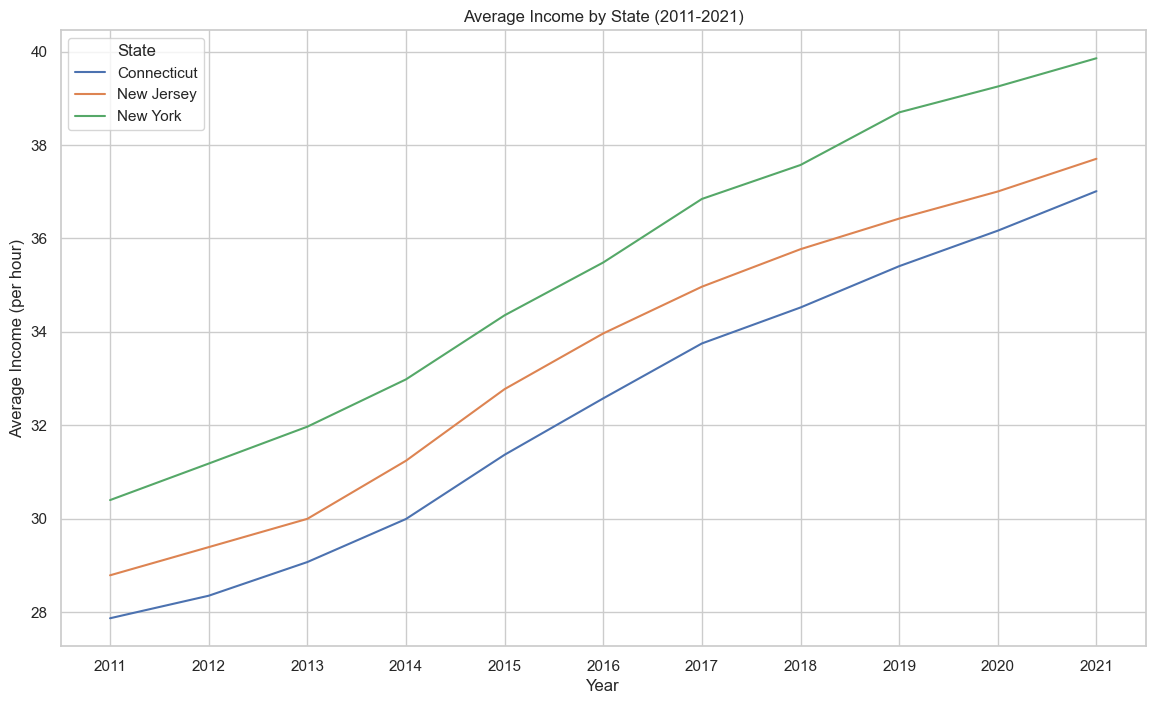

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Create the line plot
plt.figure(figsize=(14, 8))

# Loop through each state and plot
for state in agg_df['state'].unique():
    state_data = agg_df[agg_df['state'] == state]
    plt.plot(state_data['year'], state_data['Households Household Income in the Past 12 Months'], label=state)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average Income (per hour)')
plt.title('Average Income by State (2011-2021)')
plt.legend(title='State')
plt.xticks(agg_df['year'].unique())  # Ensure all years are shown

# Show the plot
plt.show()


In [13]:
zipcodes = ["12207","12208", "12209", "12210", "12211", 
            "6107", "6105", "6106", "6112", "6120",
           "8608","8609", "8610", "8611", "8618"]
household3_df = household_df[household_df['zip'].isin(zipcodes)].reset_index()
merged2_df = pd.merge (household3_df, real_estate_df, on = "zip_code", how = "inner")
merged2_df

,index,zip,geography,Geographic Area Name,households,Households Margin of Error,Households Household Income in the Past 12 Months,year,zip_code,brokered_by,status,price,bed,bath,acre_lot,street,city,state,house_size
0,1752,6105,860Z200US06105,ZCTA5 06105,9685.0,637.0,35.7,2021,6105,22611.0,for_sale,224900.0,4.0,3.0,0.21,1335988.0,Hartford,Connecticut,3404.0
1,1752,6105,860Z200US06105,ZCTA5 06105,9685.0,637.0,35.7,2021,6105,33714.0,for_sale,270000.0,9.0,4.0,0.19,943362.0,Hartford,Connecticut,4526.0
2,1752,6105,860Z200US06105,ZCTA5 06105,9685.0,637.0,35.7,2021,6105,22611.0,for_sale,249900.0,3.0,2.0,0.14,1745256.0,Hartford,Connecticut,2950.0
3,1752,6105,860Z200US06105,ZCTA5 06105,9685.0,637.0,35.7,2021,6105,51868.0,for_sale,699900.0,6.0,5.0,1.14,755732.0,Hartford,Connecticut,4660.0
4,1752,6105,860Z200US06105,ZCTA5 06105,9685.0,637.0,35.7,2021,6105,79217.0,for_sale,450000.0,13.0,3.0,0.24,386959.0,Hartford,Connecticut,4094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11556,335092,12211,8600000US12211,ZCTA5 12211,4043.0,244.0,22.5,2011,12211,82956.0,sold,499900.0,3.0,3.0,0.17,1312415.0,Colonie,New York,2400.0
11557,335092,12211,8600000US12211,ZCTA5 12211,4043.0,244.0,22.5,2011,12211,45690.0,sold,349900.0,4.0,2.0,0.49,1448789.0,Colonie,New York,1900.0
11558,335092,12211,8600000US12211,ZCTA5 12211,4043.0,244.0,22.5,2011,12211,45690.0,sold,289900.0,4.0,2.0,0.36,329591.0,Colonie,New York,2262.0
11559,335092,12211,8600000US12211,ZCTA5 12211,4043.0,244.0,22.5,2011,12211,69769.0,sold,270900.0,2.0,1.0,0.33,436970.0,Colonie,New York,1042.0


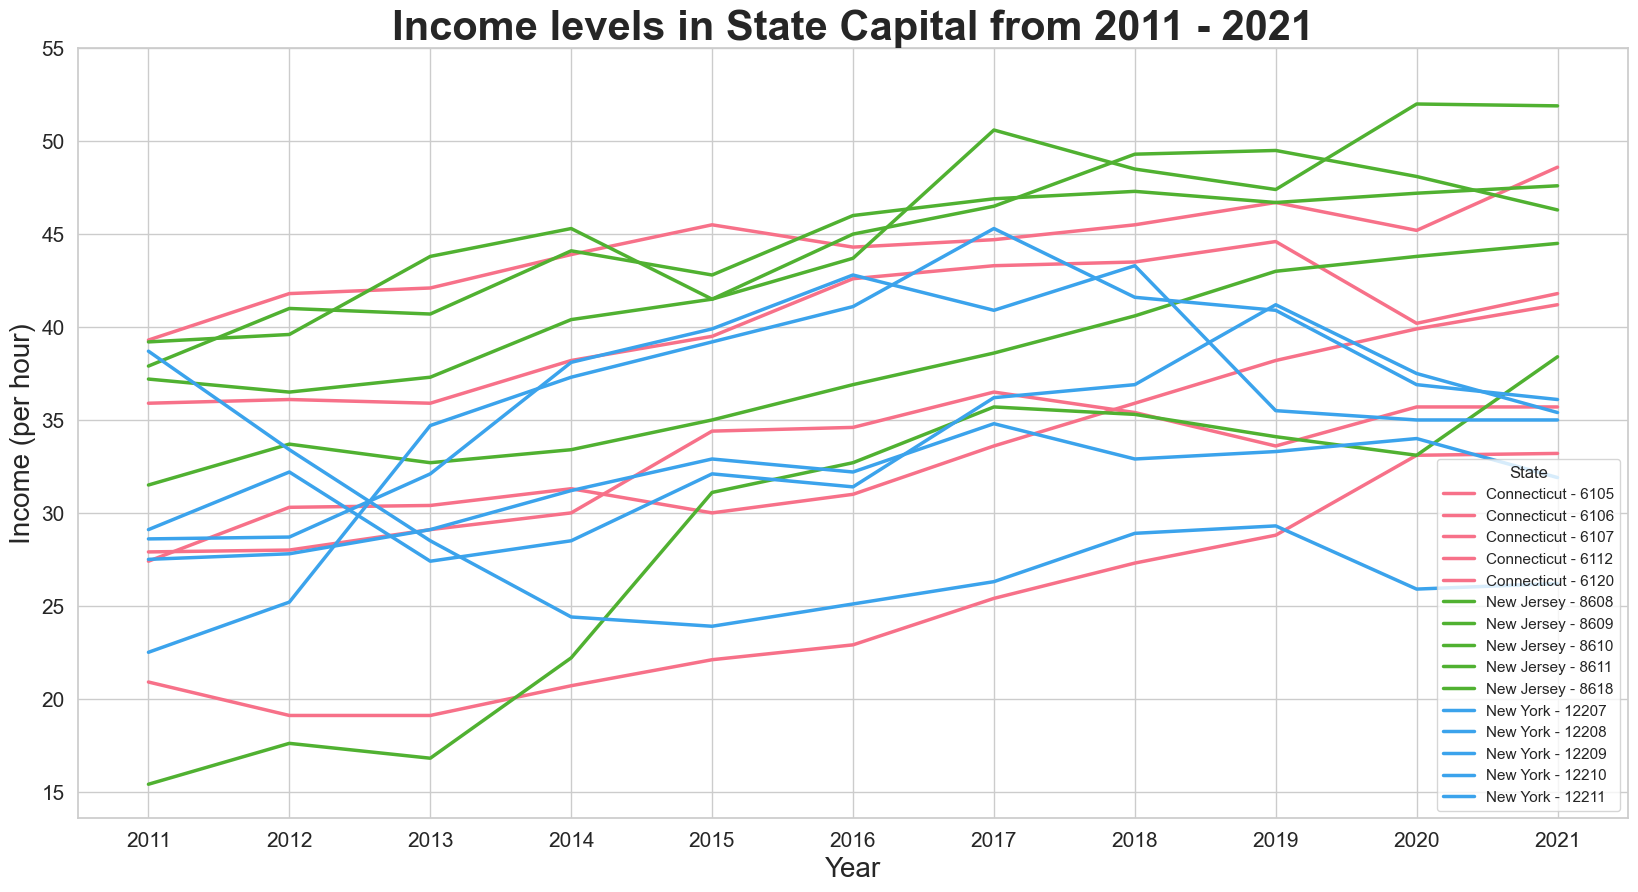

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get unique states
states = merged2_df['state'].unique()

# Generate a color palette with different shades for each state
palette = sns.color_palette("husl", len(states))
state_colors = dict(zip(states, palette))

# Set the plot size for better visibility
plt.figure(figsize=(20, 10))

# Plot each ZIP code's income trend, color-coded by state
for state in states:
    state_data = merged2_df[merged2_df['state'] == state]
    for zipcode in state_data['zip_code'].unique():
        zip_data = state_data[state_data['zip_code'] == zipcode]
        plt.plot(zip_data['year'], zip_data['Households Household Income in the Past 12 Months'], 
                 label=f"{state} - {zipcode}", color=state_colors[state], alpha=1, linewidth=2.5)

# Add labels and title
plt.xlabel('Year', fontsize = 20)
plt.xticks(range(2011, 2022), fontsize = 15)
plt.ylabel('Income (per hour)', fontsize = 20)
plt.yticks(range(15,60,5), fontsize = 15)
plt.title('Income levels in State Capital from 2011 - 2021', fontsize = 30, fontweight='bold')
plt.legend(title='State')

# Show the plot
plt.show()

In [15]:
import pandas as pd

# Calculate percent change in income levels from 2011 to 2021 grouped by state
summary = merged2_df.pivot_table(index='state', 
                                 values='Households Household Income in the Past 12 Months', 
                                 columns='year', 
                                 aggfunc='mean').reset_index()

summary['percent_change'] = ((summary[2021] - summary[2011]) / summary[2011]) * 100

# Select only the necessary columns
summary = summary[['state', 'percent_change']]
summary = summary.rename(columns={'percent_change': 'Percent Change',
                                 'state':'State'})

# Display the summary DataFrame
summary


year,State,Percent Change
0,Connecticut,39.245136
1,New Jersey,30.859255
2,New York,26.478514


In [16]:
# Calculate price per square foot
merged3_df = merged_df
merged3_df['price_per_sqft'] = merged3_df['price'] / merged3_df['house_size']

# Define the states to filter
tstates = ['Connecticut', 'New York', 'New Jersey']

# Filter the DataFrame for the selected states
merged3_df = merged3_df[merged3_df['state'].isin(tstates)]

# Group by zip_code and state, then calculate the mean price per square foot
price_zip_code = merged3_df.groupby(['zip_code', 'state'])['price_per_sqft'].mean().reset_index()

# Rename columns for better readability
price_zip_code.columns = ['zip_code', 'state', 'average_price_per_sqft']

# Display the resulting DataFrame
print(price_zip_code)


      zip_code        state  average_price_per_sqft
0         6001  Connecticut              224.248957
1         6002  Connecticut              182.540340
2         6010  Connecticut              173.814595
3         6013  Connecticut              232.045522
4         6016  Connecticut              204.968340
...        ...          ...                     ...
2448     14901     New York               42.640135
2449     14903     New York              101.816029
2450     14904     New York               52.577285
2451     14905     New York               70.250066
2452     18064   New Jersey              192.481884

[2453 rows x 3 columns]


In [17]:
merged_file = '/Users/parthpisolkar/Desktop/Bootcamp Materials/Real Estate Project/real-estate-project3/merged2.csv'
merged2_df.to_csv(merged_file, index = False)